In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./data/Iris Flower Dataset.csv')

In [3]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    1
petal_width     1
species         0
dtype: int64

In [3]:
df1 = pd.read_csv("./clib/execution_log.csv")
df2 = pd.read_csv("./clib/execution_log_unop.csv")


In [13]:
df_all = pd.concat([df1, df2], ignore_index=True)


In [ ]:
df_all.drop(
    columns=[
        'Run'
    ],
).reset_index(drop=True)

,Implementation,Insert Time (s),Lookup Time (s),Delete Time (s)
0,Python HashTable,193.487309,60.534826,24.764444
1,Python HashTable,191.485299,61.405694,25.142556
2,Python HashTable,191.666265,62.578746,25.089075
3,Python HashTable,195.712076,60.964093,25.045528
4,Python HashTable,191.791723,61.171662,25.020129
5,Python HashTable,190.312216,60.535978,24.951736
6,Python HashTable,190.554712,60.774360,25.159042
7,Python HashTable,190.572070,60.848265,24.762981
8,Python HashTable,190.838796,60.504995,24.142637
9,Python HashTable,184.933111,59.177870,24.271873


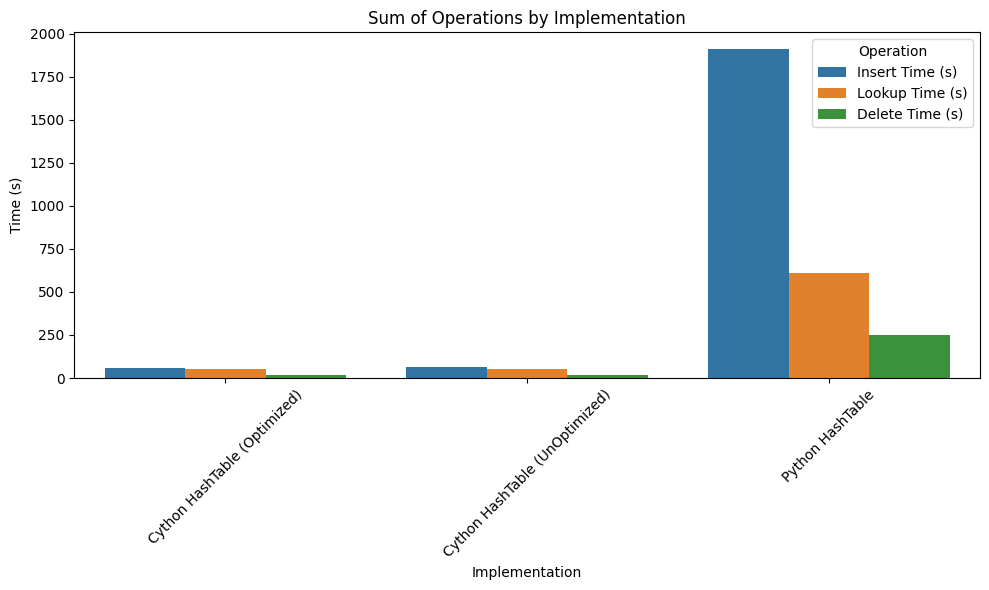

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sum_operations = df_all.groupby('Implementation')[['Insert Time (s)', 'Lookup Time (s)', 'Delete Time (s)']].sum()
sum_operations_reset = sum_operations.reset_index()
sum_operations_melted = sum_operations_reset.melt(id_vars='Implementation', 
                                                  value_vars=['Insert Time (s)', 'Lookup Time (s)', 'Delete Time (s)'], 
                                                  var_name='Operation', 
                                                  value_name='Time (s)')

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Implementation', y='Time (s)', hue='Operation', data=sum_operations_melted)

plt.title('Sum of Operations by Implementation')
plt.xlabel('Implementation')
plt.ylabel('Time (s)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

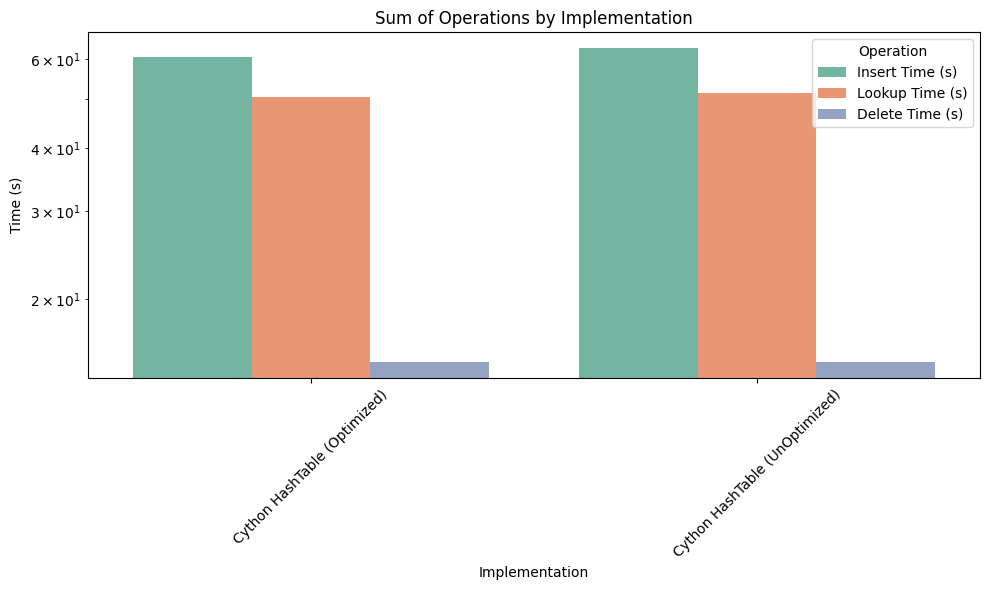

In [24]:
filtered_df = df_all[df_all['Implementation'].isin(['Cython HashTable (Optimized)', 'Cython HashTable (UnOptimized)'])]

sum_operations = filtered_df.groupby('Implementation')[['Insert Time (s)', 'Lookup Time (s)', 'Delete Time (s)']].sum()
sum_operations_reset = sum_operations.reset_index()
sum_operations_melted = sum_operations_reset.melt(id_vars='Implementation', 
                                                  value_vars=['Insert Time (s)', 'Lookup Time (s)', 'Delete Time (s)'], 
                                                  var_name='Operation', 
                                                  value_name='Time (s)')

plt.figure(figsize=(10, 6))
sns.barplot(x='Implementation', y='Time (s)', hue='Operation', data=sum_operations_melted, dodge=True)

# Customize color palette for distinct visualization
sns.set_palette("Set2")  # You can choose a color palette you prefer
plt.yscale('log')

plt.title('Sum of Operations by Implementation')
plt.xlabel('Implementation')
plt.ylabel('Time (s)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

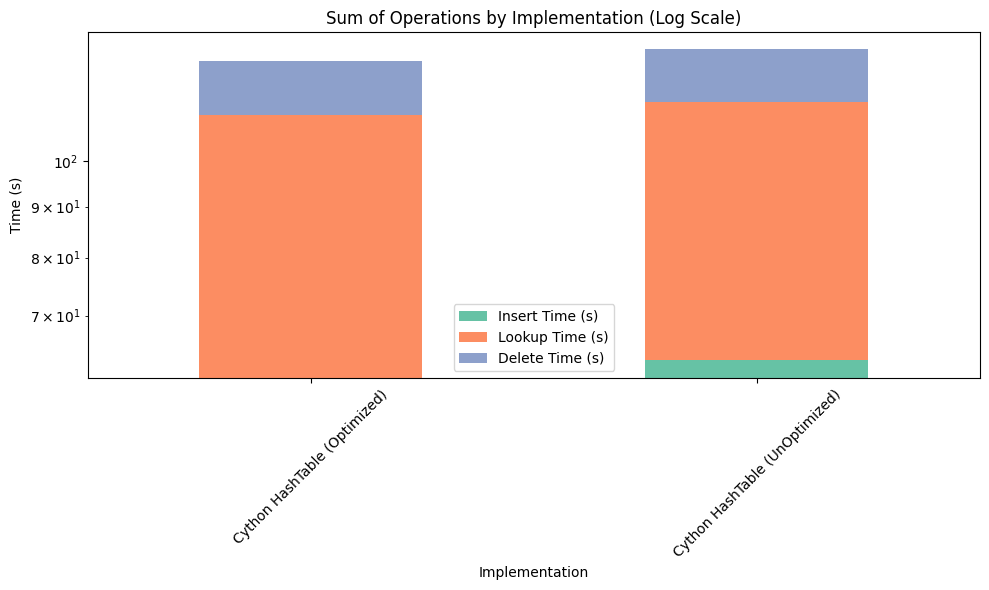

In [25]:
filtered_df = df_all[df_all['Implementation'].isin(['Cython HashTable (Optimized)', 'Cython HashTable (UnOptimized)'])]

sum_operations_stacked = filtered_df.groupby('Implementation')[['Insert Time (s)', 'Lookup Time (s)', 'Delete Time (s)']].sum()

# Stacked bar plot with a logarithmic y-axis to better show differences
sum_operations_stacked.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adjusting y-axis to logarithmic scale for better visibility
plt.yscale('log')

plt.title('Sum of Operations by Implementation (Log Scale)')
plt.xlabel('Implementation')
plt.ylabel('Time (s)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

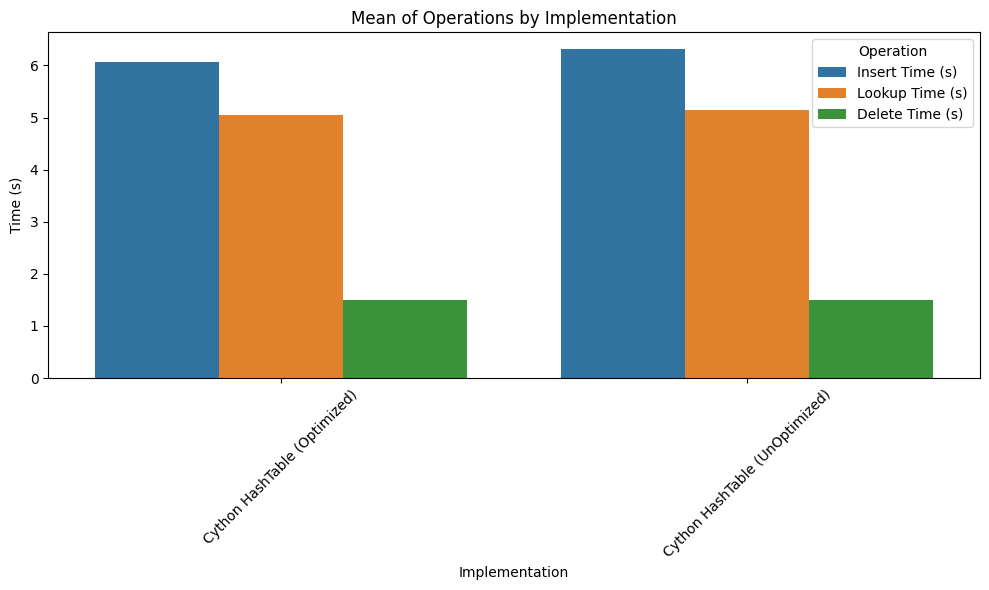

In [18]:
# Grouping by Implementation and calculating the mean of operations
filtered_df = df_all[df_all['Implementation'].isin(['Cython HashTable (Optimized)', 'Cython HashTable (UnOptimized)'])]

mean_operations = filtered_df.groupby('Implementation')[['Insert Time (s)', 'Lookup Time (s)', 'Delete Time (s)']].mean()

# Reset the DataFrame for seaborn to work effectively with melt
mean_operations_reset = mean_operations.reset_index()

# Melt the DataFrame for seaborn plotting
mean_operations_melted = mean_operations_reset.melt(id_vars='Implementation', 
                                                    value_vars=['Insert Time (s)', 'Lookup Time (s)', 'Delete Time (s)'], 
                                                    var_name='Operation', 
                                                    value_name='Time (s)')

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Implementation', y='Time (s)', hue='Operation', data=mean_operations_melted)

plt.title('Mean of Operations by Implementation')
plt.xlabel('Implementation')
plt.ylabel('Time (s)')
plt.xticks(rotation=45)
plt.tight_layout()